In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from wdtools import *

In [3]:
setID = 'Set001'

In [4]:
setgdf = gpd.read_file(os.path.join(inpath, 'GIS', 'Join_Statewide.gdb'), layer=f'WD_{setID}_Combined')

In [20]:
to_check = pd.read_csv(outpath + f'\\to_review\\tomap_{setID}.csv')

In [101]:
i=i+1

In [98]:
i=53

In [76]:
i

26

In [102]:
wdID = to_check.loc[to_check.index[i-1], 'wetdet_delin_number']
wdID

'WD2020-0667'

In [18]:
wdID = 'WD2017-0072'

In [7]:
setgdf.columns

Index(['Record_ID', 'wetdet_delin_number', 'trsqq', 'parcel_id',
       'address_location_desc', 'city', 'county', 'site_name', 'site_desc',
       'latitude', 'longitude', 'Coord_Source', 'DocumentName', 'DecisionLink',
       'is_batch_file', 'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'lot_num', 'lot',
       'Match_Year', 'ORTAXLOT', 'Match_found', 'Manual_note', 'Shape_Length',
       'Shape_Area', 'Edits_Complete', 'matcher2', 'geometry'],
      dtype='object')

<AxesSubplot:>

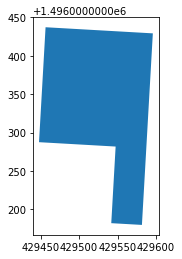

In [103]:
setgdf[setgdf.wetdet_delin_number==wdID].plot()

In [26]:
'18S12W02C' in tsq_dst

True

In [27]:
ttdf.loc[ttdf.trsqq == '18S12W02C', 'ORTaxlot']

860991    2018.00S12.00W02C0--T00000100
860992    2018.00S12.00W02C0--T00000300
860993    2018.00S12.00W02C0--T00000400
860994    2018.00S12.00W02C0--T00000401
860995    2018.00S12.00W02C0--T00000402
                      ...              
861069    2018.00S12.00W02C0--T00005800
861070    2018.00S12.00W02C0--T00005900
861071    2018.00S12.00W02C0--T00006000
861072    2018.00S12.00W02C0--T000NONTL
861073    2018.00S12.00W02C0--T000ROADS
Name: ORTaxlot, Length: 83, dtype: object

In [29]:
tid = '2018.00S12.00W02C0--000005700'

In [30]:
adjust_taxlot(tx='18S12W02C', ty=tid)

'2018.00S12.00W02C0--T00005700'

In [22]:
tid.split('--')[1][1:]

'00005700'

In [5]:
if setID == 'Set001':
    nm_to_add = 0
elif setID == 'Set002':
    nm_to_add = 1420
else:
    nm_to_add = 2143

In [6]:
wd = combine_wd_tables(setID=setID, nm_to_add=nm_to_add)

In [7]:
df = pd.DataFrame(columns = ['wetdet_delin_number', 'record_ID', 'field', 'cor_type', 'from', 'to'])

In [8]:
#ml = 'N'
ml = 'Y'

In [74]:
notes = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'review_unmatched_{setID}_r2_{ml}_0.csv'))

In [10]:
notes.wetdet_delin_number.unique()

array(['WD2018-0124', 'WD2021-0703', 'WD2018-0281', 'WD2019-0124',
       'WD2022-0261', 'WD2022-0087'], dtype=object)

In [9]:
notes.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 'latitude',
       'longitude', 'DecisionLink', 'record_ID', 'IDyear', 'correct_type',
       'correction', 'cor_trsqq', 'ORTaxlot'],
      dtype='object')

In [11]:
notes.shape

(6, 13)

In [55]:
i=1

In [43]:
i = i+1

In [48]:
i

5

In [56]:
notes.loc[i, ['wetdet_delin_number', 'record_ID', 'trsqq', 'correct_type', 'correction', 'cor_trsqq', 'parcel_id', 'ORTaxlot']]

wetdet_delin_number                                          WD2021-0703
record_ID                                                           1148
trsqq                                                           38S20E09
correct_type                                                   to review
correction             there is not any matched lot, need to review t...
cor_trsqq                                                     39S20E0000
parcel_id                                                           Many
ORTaxlot                                   1939.00S20.00E0000--0000ROADS
Name: 1, dtype: object

In [45]:
print(notes.loc[i, 'correction'])

coordinate might be incorrect, nearby taxlot is 0915.00S10.00E09BB--000008300, about 35 ft away


In [57]:
wdID = notes.loc[i,'wetdet_delin_number']

In [58]:
selcols = ['county', 'trsqq', 'parcel_id', 'latitude', 'longitude', 'record_ID', 'notes']
wd.loc[wd.wetdet_delin_number == wdID, selcols]

,county,trsqq,parcel_id,latitude,longitude,record_ID,notes
1147,Lake,38S20E09,Many,42.178657,-120.395374,1148,Many


In [16]:
ctyp = notes.loc[i,'correct_type']#.split(' and ')[1]
ctyp

'QQ'

In [59]:
ctyp = 'parcel id'

In [17]:
crt = notes.loc[i,'correction']
crt

'from 00 to CD'

In [18]:
ft = crt.split('from ')[1].split(' to ')
ft

['00', 'CD']

In [60]:
ft = ['Many', 'ROW']

In [73]:
ft[0] = '00'

In [374]:
ft[1] = 'DB'

In [517]:
f = crt.split('from ')[1].split(' and ')[0]
t = crt.split(' to ')[1].split(' and ')[0]

In [523]:
f = crt.split(' and ')[1].split(' to ')[0]
t = crt.split(' and ')[2]

In [524]:
print(f, t)

Q VE


In [61]:
rID = notes.loc[i,'record_ID']
rID

1148

In [66]:
df = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r2_{ml}_notes.csv'))

In [63]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [67]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'parcel id', 'cor_type': ctyp, 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [525]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': f, 'to': t},
        ignore_index = True)

In [597]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'county', 'cor_type': 'county', 'from': 'Benton', 'to': 'Polk'},
        ignore_index = True)

In [71]:
df.tail(5)

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2018-0124,1089,trsqq,QQ,0,CD
1,WD2021-0703,1148,trsqq,section number,9,00
2,WD2021-0703,1148,parcel_id,parcel id,Many,ROW


In [70]:
df.loc[2, 'field'] = 'parcel_id'

In [72]:
df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r2_{ml}_notes.csv'), index=False)

In [400]:
df.shape

(28, 6)

In [636]:
df = pd.DataFrame(columns = ['wetdet_delin_number', 'field', 'cor_type', 'from', 'to'])

In [349]:
wdID

'WD2020-0668'

In [171]:
url = wd.loc[wd.wetdet_delin_number == 'WD2018-0522', 'DecisionLink'].values[0]
webbrowser.open(url)

True

In [350]:
for i in range(1, 3):
    extract_page_from_docLink(url=url, pageNm=i, wdID=wdID)
#     extract_page_from_locPath(filePath=r'T:\DCProjects\EPA-WD\docs\WD20210179 Agency Decision.pdf', 
#                           pageNm=i, wdID='WD2021-0179')
    print(i)

1
2


In [7]:
setgdf = gpd.read_file(os.path.join(inpath, 'GIS', 'Join_Statewide.gdb'), layer=f'WD_{setID}_Combined')

In [52]:
rev_r2 = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'review_unmatched_{setID}_r2_{ml}_0.csv'))

In [53]:
rev_r2

,wetdet_delin_number,trsqq,parcel_id,county,latitude,longitude,DecisionLink,record_ID,IDyear,correct_type,correction,cor_trsqq,ORTaxlot
0,WD2018-0124,39S20E21,ROWs,Lake,42.164626,-120.366529,https://docs.dsl.state.or.us/PublicReview/docv...,1089,2018,QQ,from 00 to CD,39S20E21CD,1939.00S20.00E21CD--0000ROADS
1,WD2021-0703,38S20E09,Many,Lake,42.178657,-120.395374,NaN,1148,2021,to review,"there is not any matched lot, need to review t...",39S20E0000,1939.00S20.00E0000--0000ROADS
2,WD2018-0281,25S13W04,MANY,Coos,43.432600,-124.240200,https://docs.dsl.state.or.us/PublicReview/Elec...,209,2018,to review,"there is not any matched lot, need to review t...",25S13W0300,0625.00S13.00W0300--000000200
3,WD2019-0124,36S02W28,"Many,ROW,All part",Jackson,42.419580,-122.954460,https://docs.dsl.state.or.us/PublicReview/Elec...,807,2019,to review,"there is not any matched lot, need to review t...",36S02W2100,1536.00S02.00W2100--000001300
4,WD2022-0261,29S15W12,ROW,Coos,43.081203,-124.430481,NaN,327,2022,coordinate,"coordinate might be incorrect, nearby taxlot i...",29S15W12,0629.00S15.00W1200--000000100
5,WD2022-0087,15S10E09BB,Elm St ROW,Deschutes,44.288619,-121.549925,https://docs.dsl.state.or.us/PublicReview/Elec...,559,2022,coordinate,"coordinate might be incorrect, nearby taxlot i...",15S10E09BB,0915.00S10.00E09BB--000008300


In [10]:
i=0

In [ ]:
i=i+1

In [11]:
rev_r2.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 'latitude',
       'longitude', 'DecisionLink', 'record_ID', 'IDyear', 'correct_type',
       'correction', 'cor_trsqq', 'ORTaxlot'],
      dtype='object')

In [54]:
rev_r2.loc[1, :]

wetdet_delin_number                                          WD2021-0703
trsqq                                                           38S20E09
parcel_id                                                           Many
county                                                              Lake
latitude                                                       42.178657
longitude                                                    -120.395374
DecisionLink                                                         NaN
record_ID                                                           1148
IDyear                                                              2021
correct_type                                                   to review
correction             there is not any matched lot, need to review t...
cor_trsqq                                                     39S20E0000
ORTaxlot                                   1939.00S20.00E0000--0000ROADS
Name: 1, dtype: object

In [75]:
notes = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\unmatched_df_Set001_r2_Y_notes.csv'))

In [76]:
adjust_cor_from_to(notes)

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2018-0124,1089,trsqq,QQ,00,CD
1,WD2021-0703,1148,trsqq,section number,09,00
2,WD2021-0703,1148,parcel_id,parcel id,Many,ROW
